In [1]:
## San Francisco Housing Rental Analysis

In [21]:
 # initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [22]:
 # Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [7]:
## Load Data

In [24]:
# Read in the census data into a Pandas DataFrame
file_path = Path("../Resources/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [21]:
## Housing Units per Year

In [30]:
# Calculate the mean number of housing units per year (hint: use groupby)
housing_units_by_year = (sfo_data.groupby('year')['housing_units'].mean())
print(housing_units_by_year)

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64


In [38]:
 # Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
housing_units_by_year.hvplot.bar(x='year', y='housing_units', ylim=(372000, 385000)).opts(title="Housing Units in San Francisco from 2010 to 2016", yformatter="%.0f", width=600)

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

:Bars   [year]   (housing_units)

In [24]:
## Average Prices per Square Foot

In [55]:
# Calculate the average gross rent and average sale price per square foot
avg_gross_rent = (sfo_data.groupby('year')['gross_rent'].mean())
avg_price_sqr_ft = (sfo_data.groupby('year')['sale_price_sqr_foot'].mean())


<AxesSubplot:xlabel='year'>

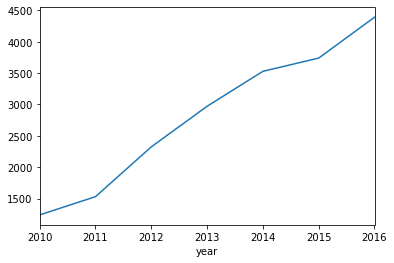

In [56]:
# Plot the Average Gross Rent per Year as a Line Chart 
avg_gross_rent.plot(label='Average Gross Rent San Francisco')

In [39]:
## Average Sales Price per Year

<AxesSubplot:xlabel='year'>

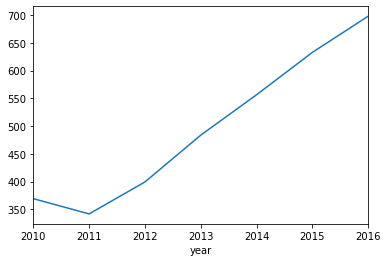

In [41]:
# Plot the Average Sales Price per Year as a line chart
sfo_data.groupby('year')['sale_price_sqr_foot'].mean().plot()

In [5]:
## Average Prices by Neighborhood

In [44]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_df = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()
print(neighborhood_df)

     year                   neighborhood  sale_price_sqr_foot  housing_units  \
0    2010                   Alamo Square           291.182945         372560   
1    2010                     Anza Vista           267.932583         372560   
2    2010                        Bayview           170.098665         372560   
3    2010               Buena Vista Park           347.394919         372560   
4    2010               Central Richmond           319.027623         372560   
5    2010                 Central Sunset           418.172493         372560   
6    2010                 Corona Heights           369.359338         372560   
7    2010                     Cow Hollow           569.379968         372560   
8    2010                  Croker Amazon           165.645730         372560   
9    2010                Diamond Heights           456.930822         372560   
10   2010                      Downtown            241.804552         372560   
11   2010  Eureka Valley/Dolores Heights

In [43]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
neighborhood_df.hvplot(label='Average Price per Square Feet by Year', x='year', y='sale_price_sqr_foot', groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [8]:
## The Top 10 Most Expensive Neighborhoods

In [58]:
 # Getting the data from the top 10 expensive neighborhoods
 avg_neighborhood_sale_price = neighborhood_df.drop(columns=['year']).groupby('neighborhood').mean()
 top_expensive_neighborhood = avg_neighborhood_sale_price.sort_values("sale_price_sqr_foot", ascending = False).head(10)

 print(top_expensive_neighborhood)

                       sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                          
Union Square District           903.993258      377427.50  2555.166667
Merced Heights                  788.844818      380348.00  3414.000000
Miraloma Park                   779.810842      375967.25  2155.250000
Pacific Heights                 689.555817      378401.00  2817.285714
Westwood Park                   687.087575      382295.00  3959.000000
Telegraph Hill                  676.506578      378401.00  2817.285714
Presidio Heights                675.350212      378401.00  2817.285714
Cow Hollow                      665.964042      378401.00  2817.285714
Potrero Hill                    662.013613      378401.00  2817.285714
South Beach                     650.124479      375805.00  2099.000000


In [10]:
 # Plotting the data from the top 10 expensive neighborhoods

In [11]:
## Parallel Coordinates and Parallel Categories Analysis

In [12]:
# Parallel Coordinates plot

In [13]:
# Parallel Categories Plot

In [14]:
## Neighborhood Map

In [15]:
# Load neighborhoods coordinates data